In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
sport = pd.read_csv('/home/jovyan/work/athlete_events.csv')
locations = pd.read_csv('/home/jovyan/work/noc_regions.csv')

In [52]:
sport.info()
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

In [53]:
sport.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Cleaning Process

In [54]:
from pandas.api.types import is_string_dtype

for col in sport.columns:
    if is_string_dtype(sport[col]):
        sport[col] = sport[col].str.lower()
sport.columns = sport.columns.str.lower()

sport.rename(columns={'height': 'weight', 'weight': 'height'}, inplace=True)
        
sport['height'].fillna(sport['height'].mean(), inplace=True)
sport['weight'].fillna(sport['weight'].mean(), inplace=True)
        
sport['age']= sport['age'].astype('Int64')
sport['height'] = sport['height'].round(2)
sport['weight'] = sport['weight'].round(2)

sport.head(5)

,id,name,sex,age,weight,height,team,noc,games,year,season,city,sport,event,medal
0,1,a dijiang,m,24,180.00,80.0,china,chn,1992 summer,1992,summer,barcelona,basketball,basketball men's basketball,NaN
1,2,a lamusi,m,23,170.00,60.0,china,chn,2012 summer,2012,summer,london,judo,judo men's extra-lightweight,NaN
2,3,gunnar nielsen aaby,m,24,175.34,70.7,denmark,den,1920 summer,1920,summer,antwerpen,football,football men's football,NaN
3,4,edgar lindenau aabye,m,34,175.34,70.7,denmark/sweden,den,1900 summer,1900,summer,paris,tug-of-war,tug-of-war men's tug-of-war,gold
4,5,christine jacoba aaftink,f,21,185.00,82.0,netherlands,ned,1988 winter,1988,winter,calgary,speed skating,speed skating women's 500 metres,NaN


# Youngest and Oldest Ages

In [55]:
print('Youngest Age: ', sport.age.min())
print('Oldest Age: ', sport.age.max())

Youngest Age:  10
Oldest Age:  97


# Latest and Earliest Event Dates

In [56]:
print('Oldest Year: ', sport.year.min())
print('Most recent Year: ', sport.year.max())

Oldest Year:  1896
Most recent Year:  2016


# Number of Athletes per year and season

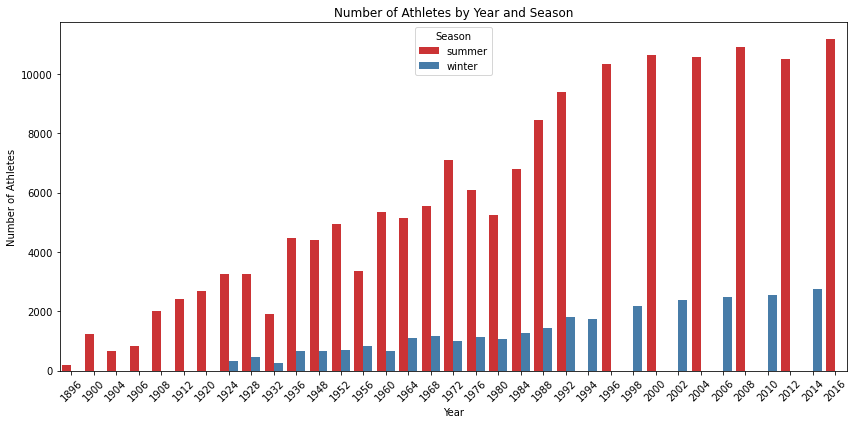

In [57]:
athletes_per_year = sport[['id', 'year', 'season']].drop_duplicates()

athlete_counts = athletes_per_year.groupby(['year', 'season']).size().reset_index(name='athlete_count')

plt.figure(figsize=(12,6))
sns.barplot(data=athlete_counts, x='year', y='athlete_count', hue='season', palette='Set1')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes by Year and Season')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

In [58]:
sport.head(25)

,id,name,sex,age,weight,height,team,noc,games,year,season,city,sport,event,medal
0,1,a dijiang,m,24,180.00,80.0,china,chn,1992 summer,1992,summer,barcelona,basketball,basketball men's basketball,NaN
1,2,a lamusi,m,23,170.00,60.0,china,chn,2012 summer,2012,summer,london,judo,judo men's extra-lightweight,NaN
2,3,gunnar nielsen aaby,m,24,175.34,70.7,denmark,den,1920 summer,1920,summer,antwerpen,football,football men's football,NaN
3,4,edgar lindenau aabye,m,34,175.34,70.7,denmark/sweden,den,1900 summer,1900,summer,paris,tug-of-war,tug-of-war men's tug-of-war,gold
4,5,christine jacoba aaftink,f,21,185.00,82.0,netherlands,ned,1988 winter,1988,winter,calgary,speed skating,speed skating women's 500 metres,NaN
5,5,christine jacoba aaftink,f,21,185.00,82.0,netherlands,ned,1988 winter,1988,winter,calgary,speed skating,"speed skating women's 1,000 metres",NaN
6,5,christine jacoba aaftink,f,25,185.00,82.0,netherlands,ned,1992 winter,1992,winter,albertville,speed skating,speed skating women's 500 metres,NaN
7,5,christine jacoba aaftink,f,25,185.00,82.0,netherlands,ned,1992 winter,1992,winter,albertville,speed skating,"speed skating women's 1,000 metres",NaN
8,5,christine jacoba aaftink,f,27,185.00,82.0,netherlands,ned,1994 winter,1994,winter,lillehammer,speed skating,speed skating women's 500 metres,NaN
9,5,christine jacoba aaftink,f,27,185.00,82.0,netherlands,ned,1994 winter,1994,winter,lillehammer,speed skating,"speed skating women's 1,000 metres",NaN


# More Cleaning

In [59]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [60]:
pysqldf('select distinct event from sport limit 10;')

,event
0,basketball men's basketball
1,judo men's extra-lightweight
2,football men's football
3,tug-of-war men's tug-of-war
4,speed skating women's 500 metres
5,"speed skating women's 1,000 metres"
6,cross country skiing men's 10 kilometres
7,cross country skiing men's 50 kilometres
8,cross country skiing men's 10/15 kilometres pu...
9,cross country skiing men's 4 x 10 kilometres r...


In [61]:
repeated_event_rows = sport[sport['event'].str.contains(r'\b(\w+)\b.*\b\1\b', case=False, regex=True)].copy()

repeated_event_rows['event'] = repeated_event_rows['event'].str.replace(
    r'^(?i)(\b\w+\b)(.*?)\b\1\b', r'\2\1',
    regex=True)

sport.loc[repeated_event_rows.index, 'event'] = repeated_event_rows['event']


In [62]:
pysqldf('select distinct event from sport limit 10;')

,event
0,men's basketball
1,judo men's extra-lightweight
2,men's football
3,-of-war men's tug-of-war
4,speed skating women's 500 metres
5,"speed skating women's 1,000 metres"
6,cross country skiing men's 10 kilometres
7,cross country skiing men's 50 kilometres
8,cross country skiing men's 10/15 kilometres pu...
9,cross country skiing men's 4 x 10 kilometres r...


# How many events did each athlete participate in?

In [63]:
unique_participations = sport[['id','name','event']].drop_duplicates()
event_counts = unique_participations.groupby(['id','name']).size().reset_index(name='event_count')
event_counts = event_counts.sort_values(by='id')
print(event_counts.head(26))

    id                                name  event_count
0    1                           a dijiang            1
1    2                            a lamusi            1
2    3                 gunnar nielsen aaby            1
3    4                edgar lindenau aabye            1
4    5            christine jacoba aaftink            2
5    6                     per knut aaland            5
6    7                        john aalberg            5
7    8  cornelia "cor" aalten (-strannood)            2
8    9                    antti sami aalto            1
9   10      einar ferdinand "einari" aalto            1
10  11                  jorma ilmari aalto            1
11  12                   jyri tapani aalto            1
12  13                  minna maarit aalto            1
13  14      pirjo hannele aalto (mattila-)            1
14  15                arvo ossian aaltonen            2
15  16            juhamatti tapio aaltonen            1
16  17             paavo johannes aaltonen      

# Average Age and Height in each Sport

              sport        age     height      weight
0       aeronautics  26.000000  70.700000  175.340000
1     alpine skiing  23.205462  71.683973  173.999536
2          alpinism  38.812500  70.700000  175.340000
3           archery  27.935226  70.143359  173.559237
4  art competitions  45.901009  70.770570  175.328524
5         athletics  25.161223  69.475510  176.120645
6         badminton  25.671242  68.336307  174.234592
7          baseball  26.240761  84.918792  182.209530
8        basketball  25.324598  82.925176  188.627359
9     basque pelota  26.000000  70.700000  175.340000


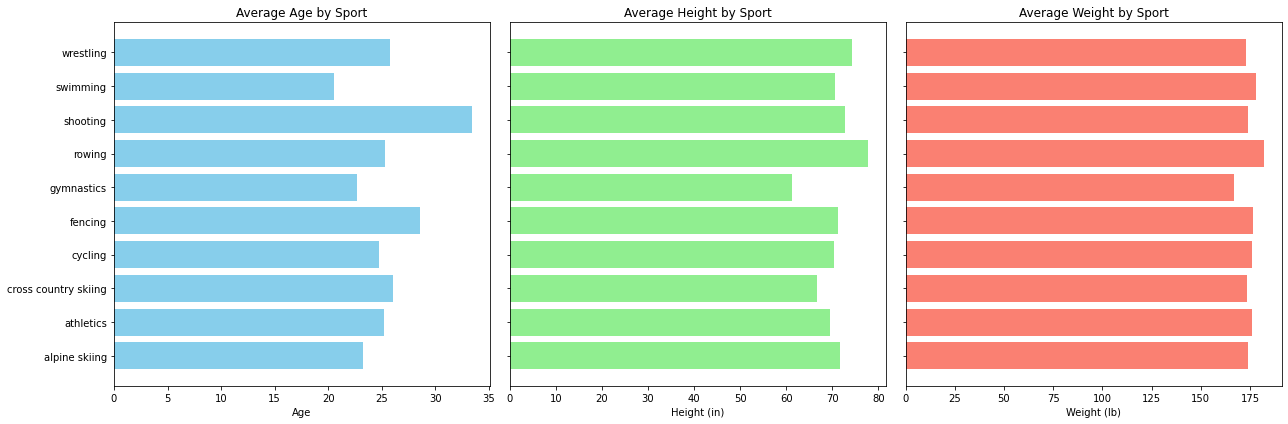

In [89]:
avg_age_height_by_sport = sport.groupby('sport')[['age','height','weight']].mean().reset_index()
print(avg_age_height_by_sport.head(10))

top_sports = sport['sport'].value_counts().head(10).index
subset = avg_age_height_by_sport[avg_age_height_by_sport['sport'].isin(top_sports)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].barh(subset['sport'], subset['age'], color='skyblue')
axes[0].set_title('Average Age by Sport')
axes[0].set_xlabel('Age')

axes[1].barh(subset['sport'], subset['height'], color='lightgreen')
axes[1].set_title('Average Height by Sport')
axes[1].set_xlabel('Height (in)')

axes[2].barh(subset['sport'], subset['weight'], color='salmon')
axes[2].set_title('Average Weight by Sport')
axes[2].set_xlabel('Weight (lb)')

plt.tight_layout()
plt.show()

# Which athletes won the most medals?

In [65]:
medals = sport[sport['medal'].notna()]
most_medaled_athletes = medals.groupby(['name','sport']).size().reset_index(name='medal_count')
most_medaled_athletes = most_medaled_athletes.sort_values(by='medal_count', ascending=False)
print(most_medaled_athletes.head(10))

                                     name       sport  medal_count
18232             michael fred phelps, ii    swimming           28
15439  larysa semenivna latynina (diriy-)  gymnastics           18
19545        nikolay yefimovich andrianov  gymnastics           15
24631                         takashi ono  gymnastics           13
3233          borys anfiyanovych shakhlin  gymnastics           13
6123                  edoardo mangiarotti     fencing           13
19863                 ole einar bjrndalen    biathlon           13
19096       natalie anne coughlin (-hall)    swimming           12
721               aleksey yuryevich nemov  gymnastics           12
3037               birgit fischer-schmidt    canoeing           12


# Which athletes competed in the most Olympic Games?

In [66]:
unique_games = sport[['id', 'name','noc', 'games']].drop_duplicates()
games_per_athlete = unique_games.groupby(['id', 'name','noc']).size().reset_index(name='games_participated')
games_per_athlete = games_per_athlete.sort_values(by='games_participated', ascending=False)
print(games_per_athlete.head(10))


            id                            name  noc  games_participated
80783    79855                      ian millar  can                  10
100304   99155                hubert raudaschl  aut                   9
121412  119965  lesley allison thompson-willie  can                   8
32776    32458               paul bert elvstrm  den                   8
28314    28051                   piero d'inzeo  ita                   8
28315    28052                raimondo d'inzeo  ita                   8
14546    14388            francisco boza dibos  per                   8
122125  120661                 mark james todd  nzl                   7
58401    57803                   noriaki kasai  jpn                   7
46901    46438     seiko hashimoto (-ishizaki)  jpn                   7


# Who participated in both Olympic seasons

In [67]:
seasons = sport[['id', 'name', 'season']].drop_duplicates()
season_counts = seasons.groupby(['id', 'name'])['season'].nunique().reset_index(name='season_count')
both_season_athletes = season_counts[season_counts['season_count'] == 2]
print(both_season_athletes.head(10))

          id                                   name  season_count
769      770                            marcus adam             2
4659    4660                            shinji aoto             2
5428    5429  karl wilhelm konrad arwe (andersson-)             2
5604    5605                 jorun askersrud-tangen             2
7977    7978                          bryan barnett             2
9183    9184                           timothy beck             2
9248    9249                    bjrn runald beckman             2
9738    9739                     antonella bellutti             2
10539  10540            sven olof lennart bergquist             2
10990  10991                          gilbert bessi             2


# Average Age of medalists over time

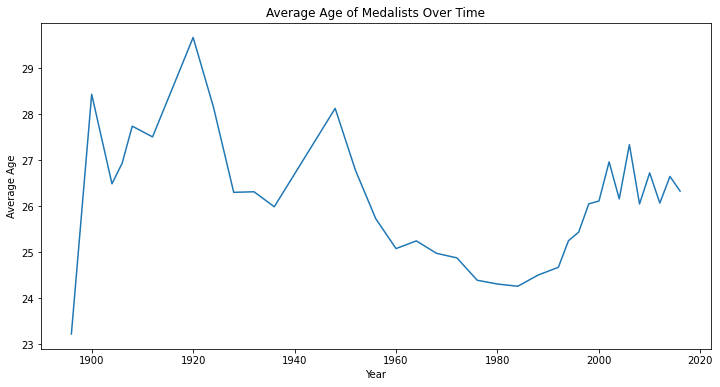

In [68]:
medalists = sport[sport['medal'].notna()]
avg_age_by_year = medalists.groupby('year')['age'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_age_by_year, x='year', y='age')
plt.title('Average Age of Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.show()

# Athletes with most medals

In [69]:
athlete_medals = sport.groupby('name')['medal'].count().reset_index(name='medal_count')
print(athlete_medals.sort_values(by='medal_count', ascending=False).head(10))

                                                   name  medal_count
87134                           michael fred phelps, ii           28
73434                larysa semenivna latynina (diriy-)           18
94303                      nikolay yefimovich andrianov           15
29662                               edoardo mangiarotti           13
16237                       borys anfiyanovych shakhlin           13
119484                                      takashi ono           13
95711                               ole einar bjrndalen           13
58056   jennifer elisabeth "jenny" thompson (-cumpelik)           12
112545                                       sawao kato           12
15427                            birgit fischer-schmidt           12


# How many medals per country?

     noc  total_medals
141  usa          5637
139  urs          2503
49   ger          2165
46   gbr          2068
43   fra          1777
67   ita          1637
123  swe          1536
20   can          1352
6    aus          1320
112  rus          1165


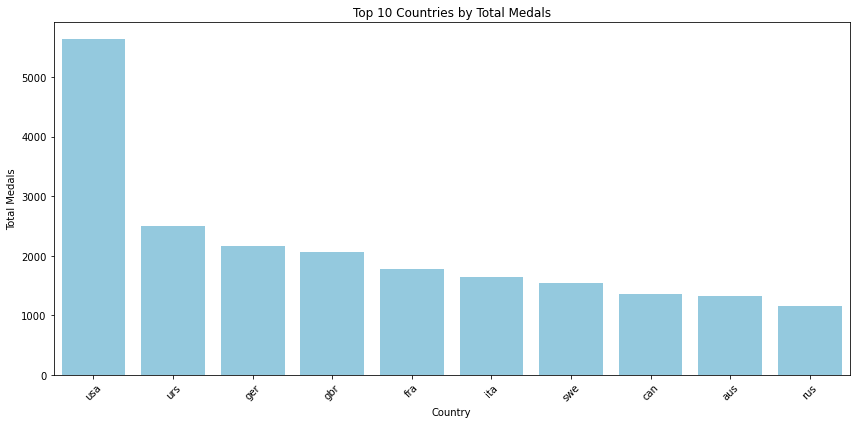

In [86]:
medal_winners = sport[sport['medal'].notna()]
medals_per_country = medal_winners.groupby('noc')['medal'].count().reset_index(name='total_medals')
medals_per_country = medals_per_country.sort_values(by='total_medals', ascending=False)
print(medals_per_country.head(10))

plt.figure(figsize=(12,6))
sns.barplot(data=medals_per_country.head(10), x='noc', y='total_medals', color='skyblue')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which countries won the most gold medals?

In [71]:
medal_counts = sport[sport['medal'].notnull()]

country_medal_type = medal_counts.groupby(['noc', 'medal']).size().unstack(fill_value=0)
d7 = country_medal_type.sort_values(by='gold',ascending=False).head(10)
print(d7)

medal  bronze  gold  silver
noc                        
usa      1358  2638    1641
urs       689  1082     732
ger       746   745     674
gbr       651   678     739
ita       531   575     531
fra       666   501     610
swe       535   479     522
can       451   463     438
hun       371   432     332
gdr       281   397     327


<Figure size 864x432 with 0 Axes>

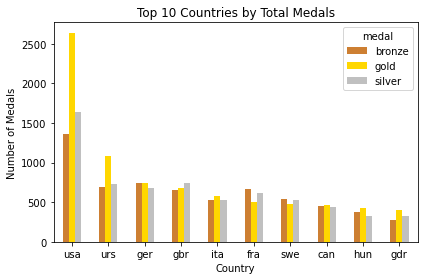

In [72]:
medal_colors = {
    'gold': '#FFD700',
    'silver': '#C0C0C0',
    'bronze': '#CD7F32'
}

plt.figure(figsize=(12, 6))

d7.plot(kind='bar', color=[medal_colors[col] for col in d7.columns])

plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Medal distribution by sport?

medal                             bronze  gold  silver
event                                                 
 hockey men's ice hockey             409   407     414
 hockey women's ice hockey            98   101     101
 men's 17-man naval rowing boats      17    17      17
 men's 200 metres team swimming        4     4       5
 men's 6-man naval rowing boats        7     7       7
 men's baseball                      112   112     112
 men's basketball                    224   234     229
 men's cricket                         0    12      12
 men's curling                        26    28      30
 men's football                      441   414     414


<Figure size 1440x432 with 0 Axes>

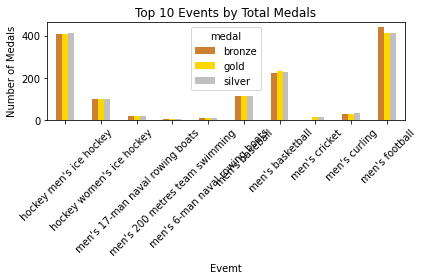

In [73]:
medal_by_sport = medal_counts.groupby(['event', 'medal']).size().unstack(fill_value=0).head(10)
print(medal_by_sport.head(10))

plt.figure(figsize=(20, 6))

medal_by_sport.plot(kind='bar', color=[medal_colors[col] for col in medal_by_sport.columns])

plt.title('Top 10 Events by Total Medals')
plt.xlabel('Evemt')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which sports have the highest medal count?

event
 men's football                     1269
 hockey men's ice hockey            1230
 men's hockey                       1050
 polo men's water polo               866
rowing men's coxed eights            730
gymnastics men's team all-around     713
 men's basketball                    687
 men's handball                      588
 men's volleyball                    495
 women's hockey                      478
dtype: int64


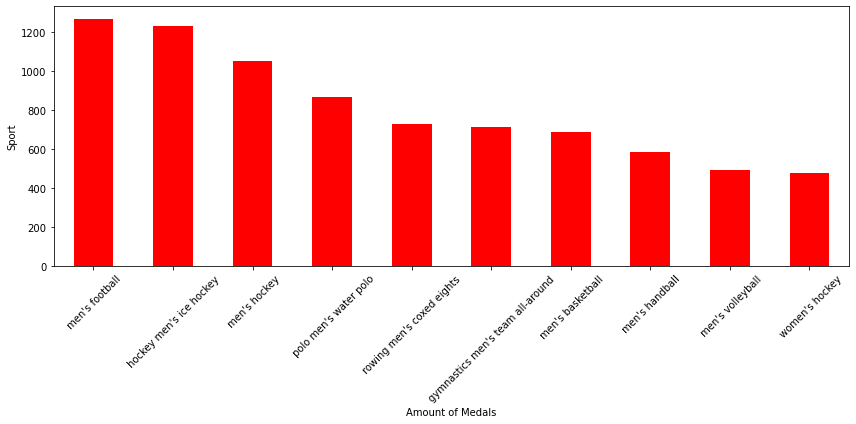

In [74]:
total_medals_sport = medal_counts.groupby('event').size().sort_values(ascending=False).head(10)
print(total_medals_sport)

plt.figure(figsize=(12,6))
total_medals_sport.plot(kind= 'bar', color= 'red')
plt.xlabel('Amount of Medals')
plt.ylabel('Sport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

# What’s the medal-winning age range for athletes?

In [75]:
medalists = sport[sport['medal'].notna()].copy()

medalists['age'] = pd.to_numeric(medalists['age'], errors='coerce')

min_age = medalists['age'].min()
max_age = medalists['age'].max()

print(f"Medal-winning athletes are between {min_age} and {max_age} years old.")


Medal-winning athletes are between 10 and 73 years old.


# How many total athletes per year?

In [76]:
athletes_per_year = sport.groupby('year')['name'].nunique().reset_index(name='athlete_count')
print(athletes_per_year)

    year  athlete_count
0   1896            176
1   1900           1220
2   1904            650
3   1906            841
4   1908           2024
5   1912           2409
6   1920           2675
7   1924           3565
8   1928           3702
9   1932           2174
10  1936           5138
11  1948           5068
12  1952           5621
13  1956           4166
14  1960           6012
15  1964           6226
16  1968           6711
17  1972           8111
18  1976           7194
19  1980           6323
20  1984           8057
21  1988           9860
22  1992          11172
23  1994           1738
24  1996          10324
25  1998           2178
26  2000          10639
27  2002           2397
28  2004          10537
29  2006           2494
30  2008          10880
31  2010           2535
32  2012          10502
33  2014           2744
34  2016          11174


# Male v Female count per year

    year sex  athlete_count
0   1896   m            176
1   1900   f             23
2   1900   m           1197
3   1904   f              6
4   1904   m            644
5   1906   f              6
6   1906   m            835
7   1908   f             44
8   1908   m           1980
9   1912   f             53
10  1912   m           2356
11  1920   f             78
12  1920   m           2597
13  1924   f            169
14  1924   m           3396
15  1928   f            340
16  1928   m           3362
17  1932   f            222
18  1932   m           1952
19  1936   f            441


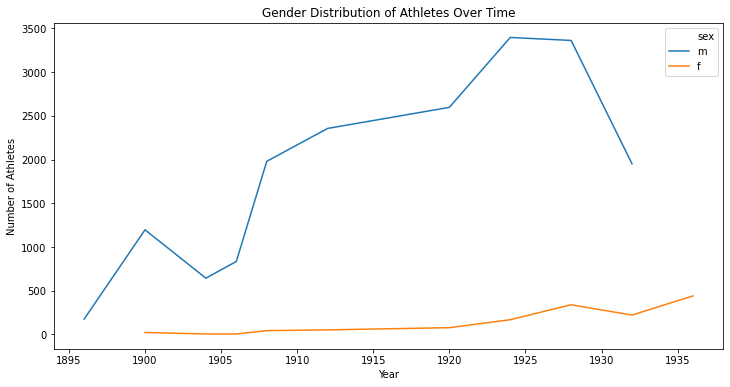

In [77]:
gender_by_year = sport.groupby(['year', 'sex'])['name'].nunique().reset_index(name='athlete_count').head(20)
print(gender_by_year)

plt.figure(figsize=(12,6))
sns.lineplot(data=gender_by_year, x='year', y='athlete_count', hue='sex')
plt.title('Gender Distribution of Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(False)
plt.show()

# Years with most amount of medals

In [78]:
medal_events = sport[sport['medal'].notna()]
medal_event_counts = medal_events.groupby('year')['event'].nunique().reset_index(name='num_medal_events')
print(medal_event_counts.sort_values(by='num_medal_events', ascending=False).head(10))

    year  num_medal_events
22  1992               314
34  2016               306
32  2012               302
30  2008               302
28  2004               301
26  2000               300
21  1988               283
24  1996               271
20  1984               260
19  1980               241


# Sports with oldest & youngest athletes

Sports with Youngest Athletes:
                    sport        age
41    rhythmic gymnastics  18.737082
54               swimming  20.566803
23         figure skating  22.232190
55  synchronized swimming  22.366851
20                 diving  22.481441
Sports with Oldest Athletes:
               sport        age
42             roque  53.333333
4   art competitions  45.901009
2           alpinism  38.812500
39              polo  35.333333
21     equestrianism  34.390831


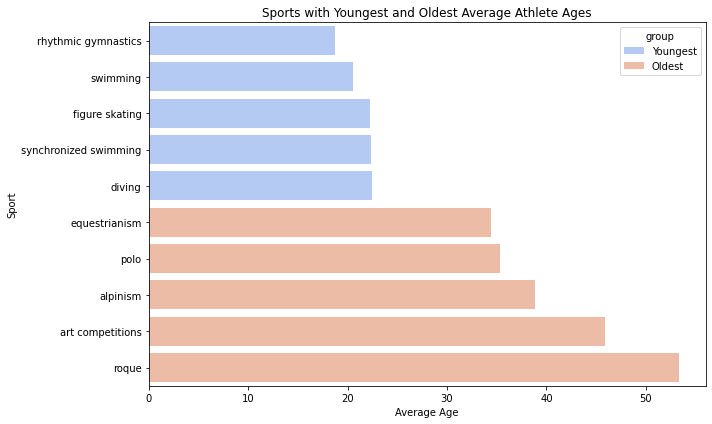

In [87]:
sport['age'] = pd.to_numeric(sport['age'], errors='coerce')

avg_age_by_sport = sport.groupby('sport')['age'].mean().reset_index()
youngest = avg_age_by_sport.sort_values(by='age').head(5)
oldest = avg_age_by_sport.sort_values(by='age', ascending=False).head(5)

print("Sports with Youngest Athletes:")
print(youngest.head(5))

print("Sports with Oldest Athletes:")
print(oldest.head(5))

age_extremes = pd.concat([youngest, oldest])
age_extremes['group'] = ['Youngest'] * 5 + ['Oldest'] * 5

age_extremes = age_extremes.sort_values(by='age')

plt.figure(figsize=(10, 6))
sns.barplot(data=age_extremes, y='sport', x='age', hue='group', dodge=False, palette='coolwarm')
plt.title('Sports with Youngest and Oldest Average Athlete Ages')
plt.xlabel('Average Age')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()
